In [20]:

import matplotlib.pyplot as plt
import numpy as np
from casadi import *

import importlib
import solvers_and_functions_package.Multi_wind as model
importlib.reload(model)



<module 'solvers_and_functions_package.Multi_wind' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\New_2D_model\\solvers_and_functions_package\\Multi_wind.py'>

Total number of variables............................:     1281
                     variables with only lower bounds:      241
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1200
Total number of inequality constraints...............:      483
        inequality constraints with only lower bounds:      243
   inequality constraints with lower and upper bounds:      240
        inequality constraints with only upper bounds:        0


Number of Iterations....: 33

                                   (scaled)                 (unscaled)
Objective...............:  -4.4300186545548104e-01   -4.4300186545548104e-01
Dual infeasibility......:   9.0012508805570217e-11    9.0012508805570217e-11
Constraint violation....:   7.9936057773011271e-15    7.9936057773011271e-15
Variable bound violation:   2.5360285427211693e-08    2.5360285427211693e-08
Complementari

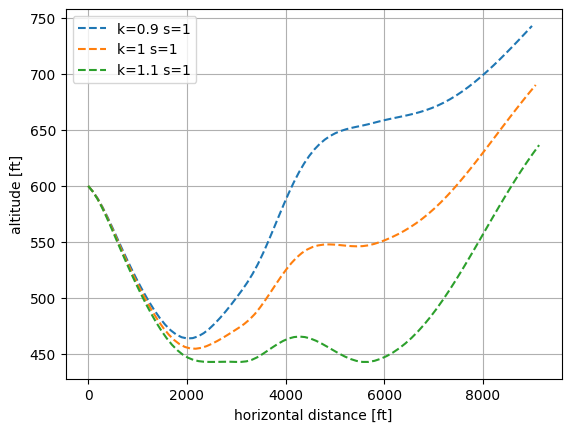

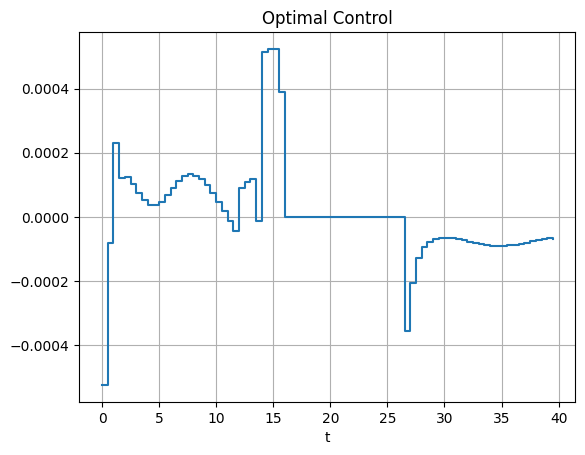

In [11]:
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
pec = False
N = 80

sols = []
k_list = [0.9, 1, 1.1]
s_list = [1,1,1]
M = len(k_list)

w, J = model.solver_min_h_scaled(k_values=k_list,s_values=s_list,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
model.ploter(w,k_list,s_list,N=N,is_scaled=True,is_bolza=False)


Total number of variables............................:     1281
                     variables with only lower bounds:      241
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1200
Total number of inequality constraints...............:      483
        inequality constraints with only lower bounds:      243
   inequality constraints with lower and upper bounds:      240
        inequality constraints with only upper bounds:        0


Number of Iterations....: 33

                                   (scaled)                 (unscaled)
Objective...............:  -4.4300186545548104e-01   -4.4300186545548104e-01
Dual infeasibility......:   9.0012508805570217e-11    9.0012508805570217e-11
Constraint violation....:   7.9936057773011271e-15    7.9936057773011271e-15
Variable bound violation:   2.5360285427211693e-08    2.5360285427211693e-08
Complementari

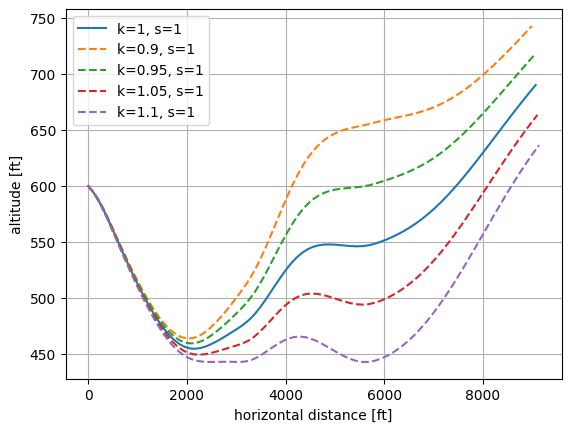

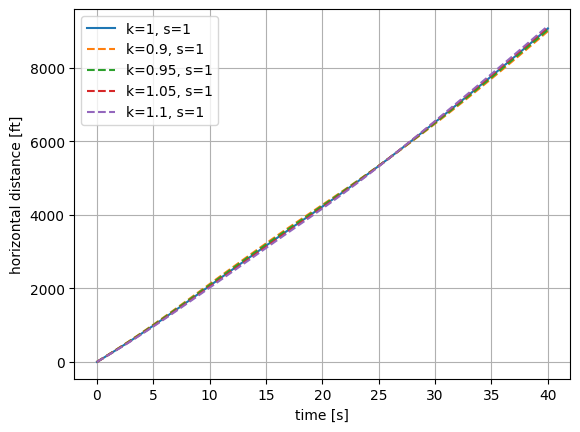

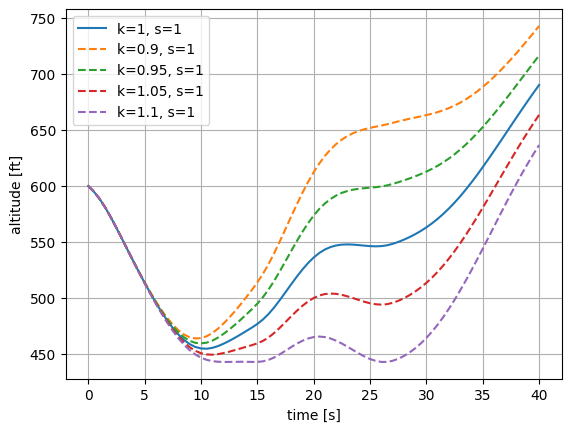

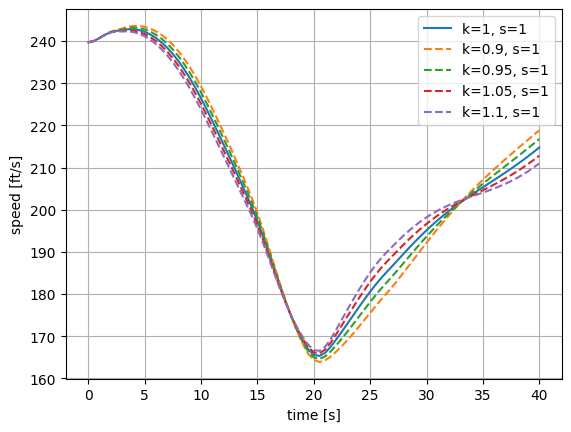

In [12]:
# Sensitivity

A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
integrator_comp = model.rk4_step_bolza
pec = False
N = 80


k_list = [0.9, 1, 1.1]
s_list = [1,1,1]
M = len(k_list)

w, J = model.solver_min_h_scaled(k_values=k_list,s_values=s_list,A_w=A_w,B_w=B_w,N=N,integrator=integrator)


u=model.u_opt_return(w,N,True)

k_values = [1, 0.9, 0.95, 1.05, 1.1]
s_values = [1, 1, 1, 1, 1]
nk = len(k_values)
sols = []

for i in range(nk):
    # {'x': X[0::5],'h': X[1::5],'v': X[2::5],'gamma': X[3::5],'alpha': X[4::5],'u':U,'t_grid':T, 'hdotdot': H_dotdot, 'J': J}
    k = k_values[i]
    s= s_values[i]
    sol = model.trajectory_computation_dictonary(u,k,s,A_w,B_w,N_org=N,integrator=integrator_comp)
    sols.append(sol)
    print(fr"k={k}, s={s}, min h = {float(min(sol['h']))}")


plt.figure()
plt.plot(sols[0]['x'], sols[0]['h'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['x'], sols[i]['h'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['x'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['x'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('horizontal distance [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['h'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['h'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.plot(sols[0]['t_grid'], sols[0]['v'], label=rf"k={k_values[0]}, s={s_values[0]}")
for i in range(1,nk):
    plt.plot(sols[i]['t_grid'], sols[i]['v'], '--', label=rf"k={k_values[i]}, s={s_values[i]}")
plt.xlabel('time [s]')
plt.ylabel('speed [ft/s]')
plt.legend()
plt.grid()
plt.show()


Total number of variables............................:     1281
                     variables with only lower bounds:      241
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1200
Total number of inequality constraints...............:      483
        inequality constraints with only lower bounds:      243
   inequality constraints with lower and upper bounds:      240
        inequality constraints with only upper bounds:        0


Number of Iterations....: 33

                                   (scaled)                 (unscaled)
Objective...............:  -4.4300186545548104e-01   -4.4300186545548104e-01
Dual infeasibility......:   9.0012508805570217e-11    9.0012508805570217e-11
Constraint violation....:   7.9936057773011271e-15    7.9936057773011271e-15
Variable bound violation:   2.5360285427211693e-08    2.5360285427211693e-08
Complementari

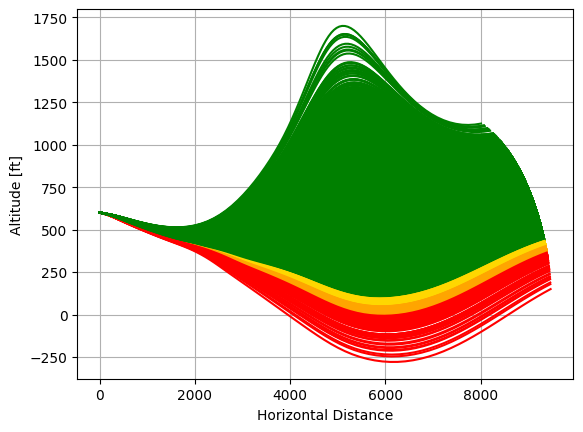

min k from sample: 0.060
max k from sample: 1.934
Minimum altitude over all runs: -278.476
Crash rate: 0.8%
Fail 50 feet rate: 1.7399999999999998%
Fail 100 rate: 3.05%
{'x2dotdot_low': [], 'x2dotdot_high': []}


In [19]:
# vary k and s
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
pec = False
N = 80

k_list = [0.9, 1, 1.1]
s_list = [1,1,1]

w, J = model.solver_min_h_scaled(k_values=k_list,s_values=s_list,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
u = model.u_opt_return(w,N,True)

violating_ks = model.MC_simulations(u,10000,A_w,B_w,1,1,1,0.5, integrator=model.MC_rk4_step)
print(violating_ks)

Total number of variables............................:     1281
                     variables with only lower bounds:      241
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1200
Total number of inequality constraints...............:      483
        inequality constraints with only lower bounds:      243
   inequality constraints with lower and upper bounds:      240
        inequality constraints with only upper bounds:        0


Number of Iterations....: 43

                                   (scaled)                 (unscaled)
Objective...............:  -1.4500693556721586e-01   -1.4500693556721586e-01
Dual infeasibility......:   2.4480417692986109e-14    2.4480417692986109e-14
Constraint violation....:   5.1070259132757201e-15    5.1070259132757201e-15
Variable bound violation:   2.4376178409113436e-08    2.4376178409113436e-08
Complementari

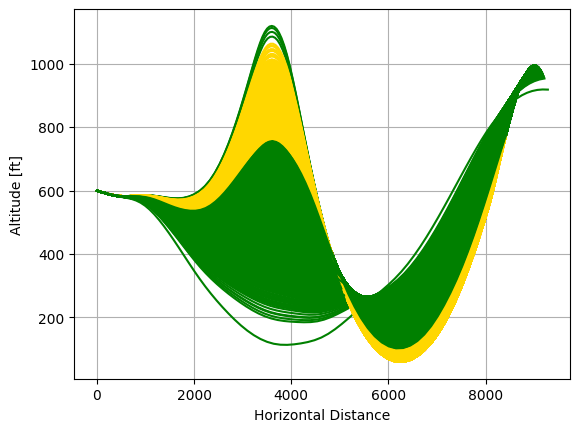

min k from sample: 0.770
max k from sample: 1.269
min s from sample: 0.621
max s from sample: 1.687
Minimum altitude over all runs: 59.868
Crash rate: 0.0%
Fail 50 feet rate: 0.0%
Fail 100 rate: 21.6%
{'x2dotdot_low': [], 'x2dotdot_high': []}


In [23]:
# enegry
A_w=model.A_wm1
B_w=model.B_wm1
integrator = model.rk4_step
N = 80

k = [0.75,1,1.25]
s = [1/0.75**2,1,1/1.25**2]
w, J = model.solver_min_h_scaled(k_values=k,s_values=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator)
u = model.u_opt_return(w,N,True)

violating_ks = model.MC_simulations(u,10000,A_w,B_w,2,1,1,0.25, integrator=model.MC_rk4_step)
print(violating_ks)